# Data Preprocessing

This notebook covers:
- Data loading and validation
- Train/validation/test splits
- Data augmentation strategies
- Custom dataset class testing

In [1]:
# Import libraries
import os
import sys
import torch
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# Add parent directory to path
sys.path.insert(0, os.path.abspath('..'))

from src.dataset import LungCancerDataset

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Dataset

In [2]:
# TODO: Update this path to point to your dataset
DATA_DIR = "../data/raw"

# Initialize dataset
try:
    dataset = LungCancerDataset(DATA_DIR, split="train")
    print(f"Dataset loaded successfully!")
    print(f"Total samples: {len(dataset)}")
    print(f"Classes: {dataset.get_class_names()}")
    print(f"Class distribution: {dataset.get_class_counts()}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print(f"Please ensure the dataset is organized at {DATA_DIR}")
    dataset = None

Dataset loaded successfully!
Total samples: 1097
Classes: ['normal', 'benign', 'malignant']
Class distribution: {'normal': 416, 'benign': 120, 'malignant': 561}


## Visualize Preprocessing

Test the preprocessing pipeline and visualize augmented images.

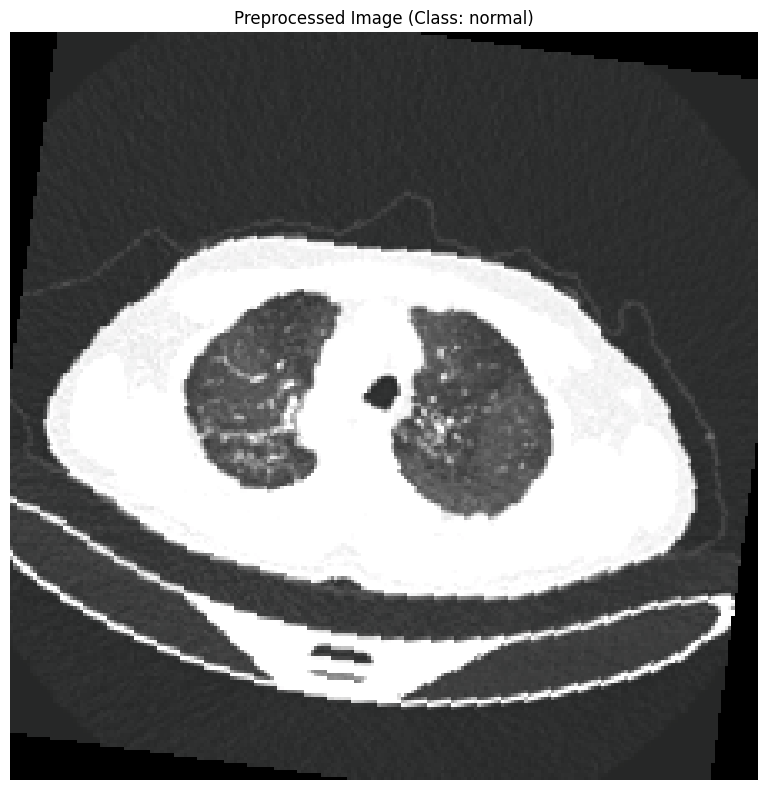

Image shape: torch.Size([3, 224, 224])
Image dtype: torch.float32
Label: normal (0)


In [3]:
# Visualize preprocessed images
if dataset and len(dataset) > 0:
    # Get a sample image
    sample_image, sample_label = dataset[0]
    
    # Denormalize for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    denormalized = sample_image * std + mean
    denormalized = torch.clamp(denormalized, 0, 1)
    
    # Display
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(denormalized.permute(1, 2, 0))
    ax.set_title(f"Preprocessed Image (Class: {dataset.get_class_names()[sample_label]})")
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Image shape: {sample_image.shape}")
    print(f"Image dtype: {sample_image.dtype}")
    print(f"Label: {dataset.get_class_names()[sample_label]} ({sample_label})")
else:
    print("Cannot visualize preprocessing: dataset not loaded")

## Train/Validation Split

In [4]:
# Create train/validation splits
if dataset and len(dataset) > 0:
    dataset_size = len(dataset)
    train_size = int(0.8 * dataset_size)
    val_size = dataset_size - train_size
    
    train_dataset, val_dataset = random_split(
        dataset,
        [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    # Update split for validation
    val_dataset.dataset.split = "val"
    
    print(f"Train size: {len(train_dataset)} ({len(train_dataset)/dataset_size*100:.1f}%)")
    print(f"Validation size: {len(val_dataset)} ({len(val_dataset)/dataset_size*100:.1f}%)")
    
    # Test DataLoader
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
    
    # Test a batch
    for images, labels in train_loader:
        print(f"Batch shape: {images.shape}")
        print(f"Labels: {labels.tolist()}")
        break
else:
    print("Cannot create splits: dataset not loaded")

Train size: 877 (79.9%)
Validation size: 220 (20.1%)
Batch shape: torch.Size([8, 3, 224, 224])
Labels: [0, 0, 0, 2, 2, 2, 1, 2]
